# **Data Science Project : Individual Planning Stage**

In [1]:
### Run this cell to load packages
library(tidyverse)
library(repr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
### Run this cell to read in player and session data
players_untidy  <- read_csv("https://raw.githubusercontent.com/SamuelPastrami/DSCI-PROJECT-IND/refs/heads/main/players.csv")
sessions_untidy <- read_csv("https://raw.githubusercontent.com/SamuelPastrami/DSCI-PROJECT-IND/refs/heads/main/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# **1. Data Description**

**How data was collected** <br>
Both datasets were collected through a Minecraft server set up by a research group within the Computer Science Department at UBC led by Frank Wood.

### -Players Dataset

In [3]:
### Run this cell to view the first 6 rows of the players dataset
head(players_untidy)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


**Summary of Players Dataset** <br>
The players data set contains 7 variables and a total of 196 observations

**Summary of each variable within this dataset**

- **experience** <br>
The experience variable is a **chr** type that shows us the experience that the players have in Minecraft prior to joining the server
- **subscribe** <br>
The subscribe variable is a **lgl** type that shows us whether the player has subscribed to the server’s newsletter.
- **hashedEmail** <br>
The hashed_email variable is a **chr** type that shows us the player's encrypted email address used to access the server
- **played_hours** <br>
The played_hours variabe is a **dbl** type that shows us the total time played of a player on the server
- **name** <br>
The name variable is a **chr** type that represents the assigned name given to a player upon joining the server
- **gender** <br>
The gender variable is a **chr** type that shows us what gender the player identifies themselves as.
- **Age** <br>
The age variable is a **dbl** type and is the age that the player reports themselves as.

**Issues** <br>
A potential issue that may be of concern in the players data set is the played_hours variable as a majority of the observations under this variable are zero and may prove to be an issue when visualizing this variable.

### -Sessions Dataset

In [4]:
### Run this cell to view the first 6 rows of sessions dataset
head(sessions_untidy)

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


**Summary of Sessions Dataset** <br>
The sessions dataset contains 5 variables and and 1535 observations

**Summary of each variable within this dataset**

- **hashedEmail** <br>
The hashed_email variable is a **chr** type that shows us the player's encrypted email address used to access the server
- **start_time** <br>
The start_time variable is a **chr** type that represents the date and time at which a player joins the server
- **end_time** <br>
The end_time variable is a **chr** type that represents the date and time at which a player leaves the server
- **original_start_time** <br>
The original_start_time variable is a **dbl** type that represents the date and time at which a player joins the server in unix time
- **original_end_time** <br>
The original_end_time variable is a **dbl** type that represents the date and time at which a player leaves the server in unix time

**Issues** <br>
A potential issue that may be of concern in the sessions data set is the start_time and end_time variables as these variables are not tidy and would need to be wrangled to separate the two values of date and time.

# **2. Question**

The question we seek to answer in this project is whether the **orginal_start_time** variable can be used to determine which month is most likely to have a large number of players on the Minecraft server


# **3. Tidying the Datasets**

The code cell below is used to tidy the datasets and prepare them for a simple visualization

In [5]:
### code to tidy dataset
sessions_rename <- sessions_untidy |>
                   rename(hashed_email = hashedEmail)
players_rename  <- players_untidy |>
                   rename(hashed_email = hashedEmail,
                         age = Age)
players         <- players_rename |>
                   mutate(experience = as_factor(experience),
                          subscribe = as_factor(subscribe),
                          gender = as_factor(gender))

sessions_sep    <- separate(sessions_rename,
                            col = start_time,
                            into = c("start_date", "start_time"),
                            sep = " ")
sessions        <- separate(sessions_rename,
                            col = end_time,
                            into = c("end_date", "end_time"),
                            sep = " ")

The players and sessions datasets contained several issues that may interfere in the process of visualization. To remedy this we tidy the datasets to prepare them for visualization 

**Summary of Changes**
- Players dataset <br>
> - Renamed **hashedEmail** and **Age** variable to **hashed_email** and **age** to have a uniform naming scheme for the variables <br>
> - Changed the type of the **experience**, **subscribe**, and **gender** variables from **chr** to **fct**
- Sessions dataset <br>
> - Renamed **hashedEmail** variable to **hashed_email** to have a uniform naming scheme for the variables
> - Seperated both **start_time** and **end_time** to seperate the date and time values within the columns

In [6]:
### Run this cell to view the first 6 rows of tidied sessions and players dataset
head(sessions)
head(players)

hashed_email,start_time,end_date,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024,17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024,03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024,16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024,17:10,1.71916e+12,1.71916e+12


experience,subscribe,hashed_email,played_hours,name,gender,age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


# **4. Summary Statistics**

### Summary of statistics for the **players** dataset

**Mean value for each quantitative variable**

In [7]:
### run to compute mean for quantitative variables in players dataset
mean <- players |>
       select(played_hours, age) |>
       map_df(mean, na.rm = TRUE) |>
       rename(avg_played_hours = played_hours,
              average_age = age)
mean

avg_played_hours,average_age
<dbl>,<dbl>
5.845918,20.52062


The cell above shows the average playtime of players in the Minecraft server which is **5.85** hours and average age of the players in the server which is **20** years old

**Proportion of Players Subscribing to the Newsletter**

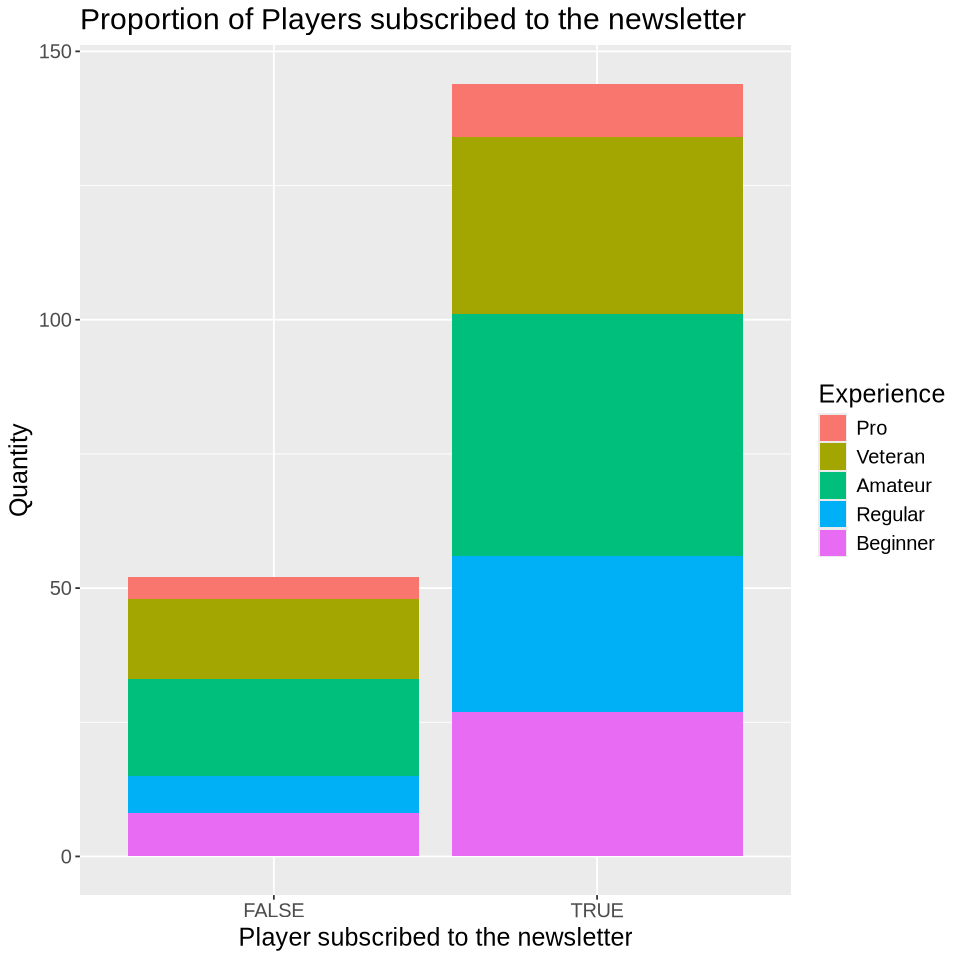

In [8]:
options(repr.plot.height = 8, repr.plot.width = 8)

bar_plot <- ggplot(players, aes(x = subscribe, fill = experience)) +
                 geom_bar() +
                 labs(x = "Player subscribed to the newsletter",
                      y = "Quantity",
                      fill = "Experience") +
                 theme(text = element_text(size = 15)) +
                 ggtitle("Proportion of Players subscribed to the newsletter")
bar_plot

**Summary of graph** <br>
Players who are Amateurs tend to subscribe to the newsletter in comparison to players with other levels of experience in Minecraft

# **5. Method and Plan**

**The method we will be using** <br>
In order to determine the month that tends to the highest player count, we will be using a **Histogram** to represent the data and determine which month is more likely for players to spend time on the Minecraft server.

**Why will we be using this method** <br>
We will be using a histogram as we can visualize the distribution of times at which players join the server and through this we can determine the peak hours/seasons of the Minecraft server

**Potential Limitations** <br>
- There are some potential limitations to this method as the demand of the Minecraft server can fluctuate due to numerous variables, and the histogram may not capture the complexity of this variability over time.
- Using this method might oversimplify complex demand patterns

#### Below is a simple histogram to visualize the count of players joining the server at certain times

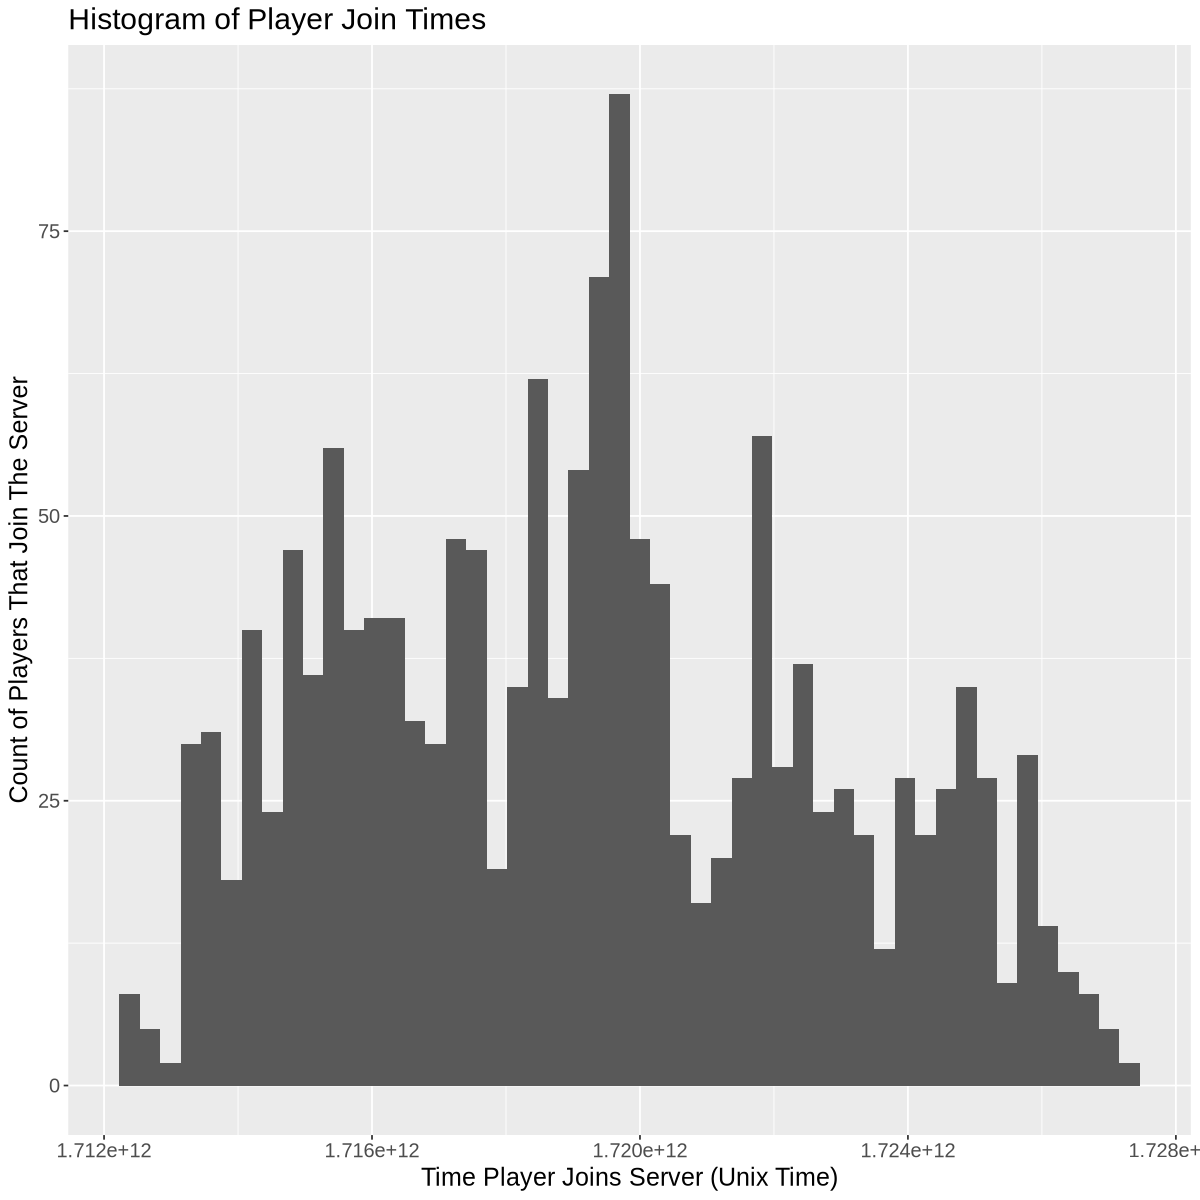

In [9]:
### code for histogram visualization
options(repr.plot.height = 10, repr.plot.width = 10)

sessions_plot <- ggplot(sessions, aes(x = original_start_time)) +
                 geom_histogram(bins = 50) +
                 labs(x = "Time Player Joins Server (Unix Time)",
                      y = "Count of Players That Join The Server") +
                 theme(text = element_text(size = 15)) +
                 ggtitle("Histogram of Player Join Times")
sessions_plot

**Summary of Histogram** <br>
The simple histogram above does show a potential time/season that has a larger count of players joining the server which shows potential in showing a certain time and date that has a higher player count than other dates and times